# Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file

In [2]:
covid_df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
covid_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# Drop unnecessary columns
SNo is id or index

In [3]:
covid_df.drop('SNo', axis=1, inplace=True)

# Transform Date to DateTimeSeries in Pandas

In [4]:
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'])
covid_df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [5]:
covid_df['Last Update'] = pd.to_datetime(covid_df['Last Update'], format='mixed')
covid_df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# Check for NaN values

In [6]:
covid_df['Province/State'].isna().sum()

78103

In [7]:
covid_df[covid_df['Province/State'].isna()]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
36,2020-01-22,NaN,Thailand,2020-01-22 17:00:00,4.0,0.0,2.0
37,2020-01-22,NaN,South Korea,2020-01-22 17:00:00,1.0,0.0,0.0
39,2020-01-22,NaN,Kiribati,2020-01-22 17:00:00,0.0,0.0,0.0
75,2020-01-23,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...
305831,2021-05-29,NaN,Vietnam,2021-05-30 04:20:55,6908.0,47.0,2896.0
305832,2021-05-29,NaN,West Bank and Gaza,2021-05-30 04:20:55,307838.0,3492.0,300524.0
305833,2021-05-29,NaN,Yemen,2021-05-30 04:20:55,6731.0,1319.0,3399.0
305834,2021-05-29,NaN,Zambia,2021-05-30 04:20:55,94751.0,1276.0,91594.0


# Exploring for how to deal with NaN values

In [8]:
covid_df[covid_df['Country/Region'] == 'Japan']

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
75,2020-01-23,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0
123,2020-01-24,NaN,Japan,2020-01-24 17:00:00,2.0,0.0,0.0
166,2020-01-25,NaN,Japan,2020-01-25 17:00:00,2.0,0.0,0.0
214,2020-01-26,NaN,Japan,2020-01-26 16:00:00,4.0,0.0,1.0
...,...,...,...,...,...,...,...
306367,2021-05-29,Unknown,Japan,2021-05-30 04:20:55,8.0,0.0,8.0
306401,2021-05-29,Wakayama,Japan,2021-05-30 04:20:55,2612.0,41.0,2410.0
306413,2021-05-29,Yamagata,Japan,2021-05-30 04:20:55,1963.0,42.0,1692.0
306414,2021-05-29,Yamaguchi,Japan,2021-05-30 04:20:55,2903.0,60.0,2330.0


# Drop duplicates

In [9]:
covid_df.drop_duplicates(subset=["ObservationDate","Province/State","Country/Region","Last Update"],ignore_index=True,inplace=True)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306428 entries, 0 to 306427
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306428 non-null  datetime64[ns]
 1   Province/State   228325 non-null  object        
 2   Country/Region   306428 non-null  object        
 3   Last Update      306428 non-null  datetime64[ns]
 4   Confirmed        306428 non-null  float64       
 5   Deaths           306428 non-null  float64       
 6   Recovered        306428 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 16.4+ MB


In [10]:
covid_df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306423,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306424,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306425,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306426,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# Counting Number of Deaths per Country

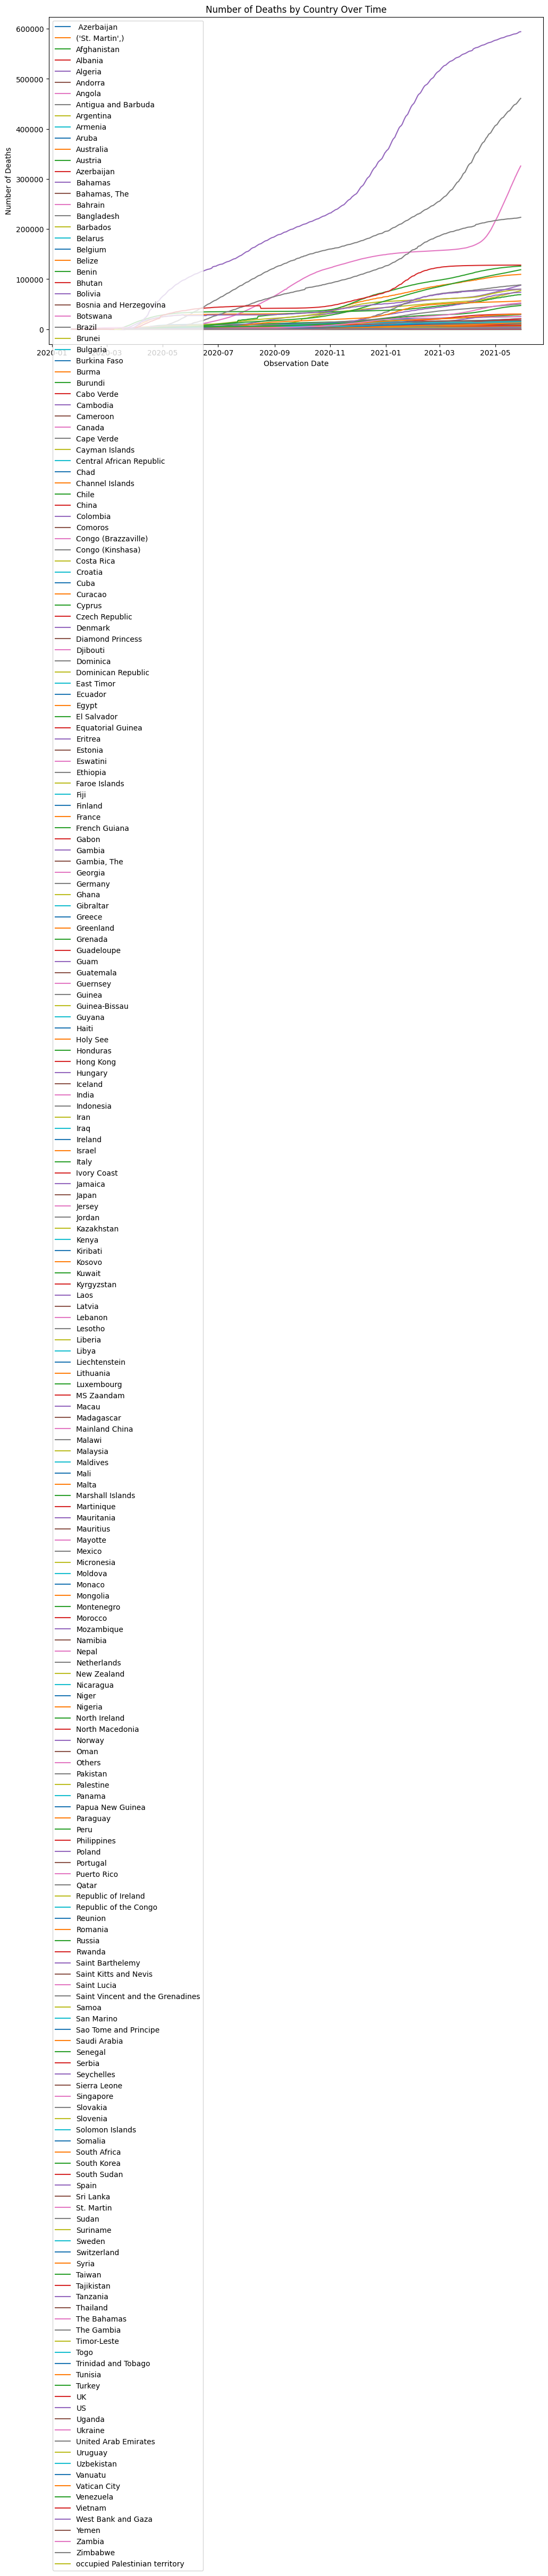

In [11]:
# Group by 'Country/Region' and 'Date' and sum the 'Deaths'
deaths_by_country = covid_df.groupby(['Country/Region', 'ObservationDate'])['Deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for country, data in deaths_by_country.groupby('Country/Region'):
    plt.plot(data['ObservationDate'], data['Deaths'], label=country)

plt.title('Number of Deaths by Country Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()


# Adding a new column
I wanted to add a new column 'Continent', since with continents the charts will be available. So I uploaded a new file to sort the continent names. It was taken from the git hub page.
url: https://gist.github.com/fogonwater/bc2b98baeb2aa16b5e6fbc1cf3d7d545

In [12]:
continents = pd.read_csv('/kaggle/input/countries-continents/countries.csv')
continents

,country_code2,country_code3,iso3,country_name,country_name_full,continent_code,continent_name
0,AD,AND,20,Andorra,Principality of Andorra,EU,Europe
1,AE,ARE,784,United Arab Emirates,United Arab Emirates,AS,Asia
2,AF,AFG,4,Afghanistan,Islamic Republic of Afghanistan,AS,Asia
3,AG,ATG,28,Antigua and Barbuda,Antigua and Barbuda,NaN,North America
4,AI,AIA,660,Anguilla,Anguilla,NaN,North America
...,...,...,...,...,...,...,...
244,YE,YEM,887,Yemen,Yemen,AS,Asia
245,YT,MYT,175,Mayotte,Mayotte,AF,Africa
246,ZA,ZAF,710,South Africa,Republic of South Africa,AF,Africa
247,ZM,ZMB,894,Zambia,Republic of Zambia,AF,Africa


In [13]:
country_to_continent = dict(zip(continents['country_name'], continents['continent_name']))
covid_df['Continent'] = covid_df['Country/Region'].map(country_to_continent)
covid_df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Continent
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,NaN
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,NaN
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,NaN
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,NaN
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
306423,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0,Europe
306424,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0,Europe
306425,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0,NaN
306426,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0,Europe


Some of the country names are missing

In [14]:
covid_df[covid_df['Continent'].isna()]['Country/Region'].unique()

array(['Mainland China', 'Macau', 'US', 'South Korea', 'Ivory Coast',
       'UK', 'Russia', 'Others', 'North Macedonia', ' Azerbaijan',
       'North Ireland', 'Saint Barthelemy', 'Palestine', 'Slovakia',
       'Vatican City', 'Republic of Ireland', 'St. Martin', 'Brunei',
       'occupied Palestinian territory', "('St. Martin',)",
       'Channel Islands', 'Holy See', 'Congo (Kinshasa)', 'Reunion',
       'Curacao', 'Eswatini', 'Kosovo', 'Congo (Brazzaville)',
       'Republic of the Congo', 'The Bahamas', 'The Gambia', 'Kyrgyzstan',
       'Gambia, The', 'Bahamas, The', 'Cabo Verde', 'East Timor', 'Syria',
       'Laos', 'Diamond Princess', 'West Bank and Gaza', 'Burma',
       'MS Zaandam'], dtype=object)

In [15]:
country_to_continent = {
    'Mainland China': 'Asia',
    'Macau': 'Asia',
    'US': 'North America',
    'South Korea': 'Asia',
    'Ivory Coast': 'Africa',
    'UK': 'Europe',
    'Russia': 'Europe',
    'Others': 'Others',
    'North Macedonia': 'Europe',
    ' Azerbaijan': 'Asia',
    'North Ireland': 'Europe',
    'Saint Barthelemy': 'North America',
    'Palestine': 'Asia',
    'Slovakia': 'Europe',
    'Vatican City': 'Europe',
    'Republic of Ireland': 'Europe',
    'St. Martin': 'North America',
    'Brunei': 'Asia',
    'occupied Palestinian territory': 'Asia',
    "('St. Martin',)": 'North America',
    'Channel Islands': 'Europe',
    'Holy See': 'Europe',
    'Congo (Kinshasa)': 'Africa',
    'Reunion': 'Africa',
    'Curacao': 'North America',
    'Eswatini': 'Africa',
    'Kosovo': 'Europe',
    'Congo (Brazzaville)': 'Africa',
    'Republic of the Congo': 'Africa',
    'The Bahamas': 'North America',
    'The Gambia': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Gambia, The': 'Africa',
    'Bahamas, The': 'North America',
    'Cabo Verde': 'Africa',
    'East Timor': 'Asia',
    'Syria': 'Asia',
    'Laos': 'Asia',
    'Diamond Princess': 'Others',
    'West Bank and Gaza': 'Asia',
    'Burma': 'Asia',
    'MS Zaandam': 'Others'
}


In [16]:

covid_df['Continent'] = covid_df['Continent'].fillna(covid_df['Country/Region'].map(country_to_continent))
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306428 entries, 0 to 306427
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306428 non-null  datetime64[ns]
 1   Province/State   228325 non-null  object        
 2   Country/Region   306428 non-null  object        
 3   Last Update      306428 non-null  datetime64[ns]
 4   Confirmed        306428 non-null  float64       
 5   Deaths           306428 non-null  float64       
 6   Recovered        306428 non-null  float64       
 7   Continent        306428 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 18.7+ MB


In [17]:
covid_df[covid_df['Continent'].isna()]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Continent


# Number of Deaths by Continent Over Time

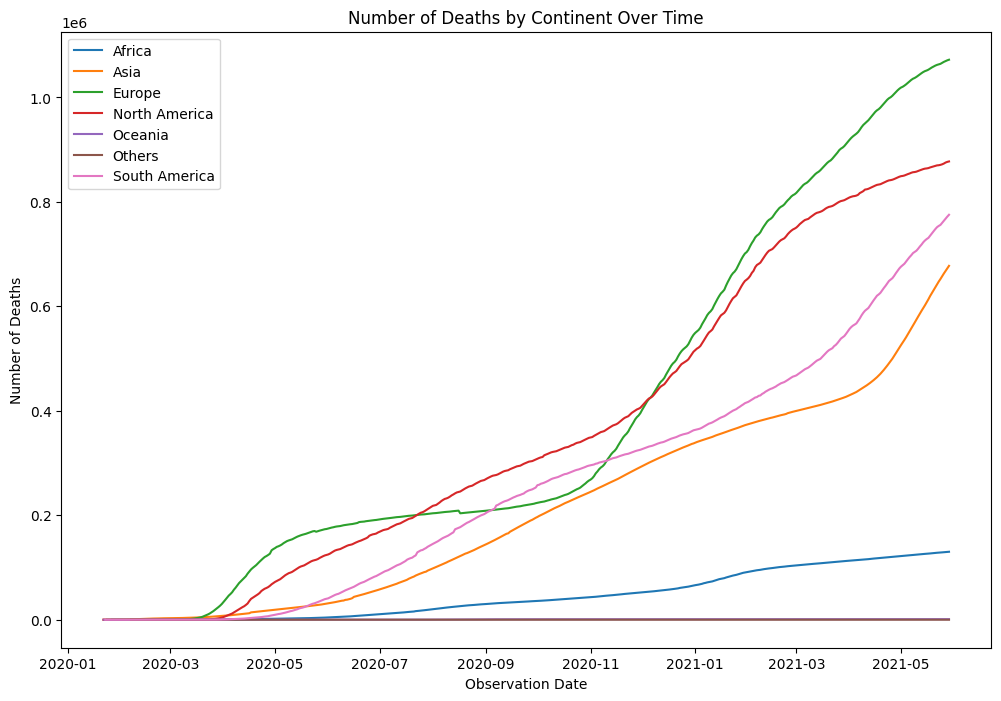

In [18]:
# Group by 'Country/Region' and 'Date' and sum the 'Deaths'
deaths_by_country = covid_df.groupby(['Continent', 'ObservationDate'])['Deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for country, data in deaths_by_country.groupby('Continent'):
    plt.plot(data['ObservationDate'], data['Deaths'], label=country)

plt.title('Number of Deaths by Continent Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

# Number of Recoveries by Continent Over Time

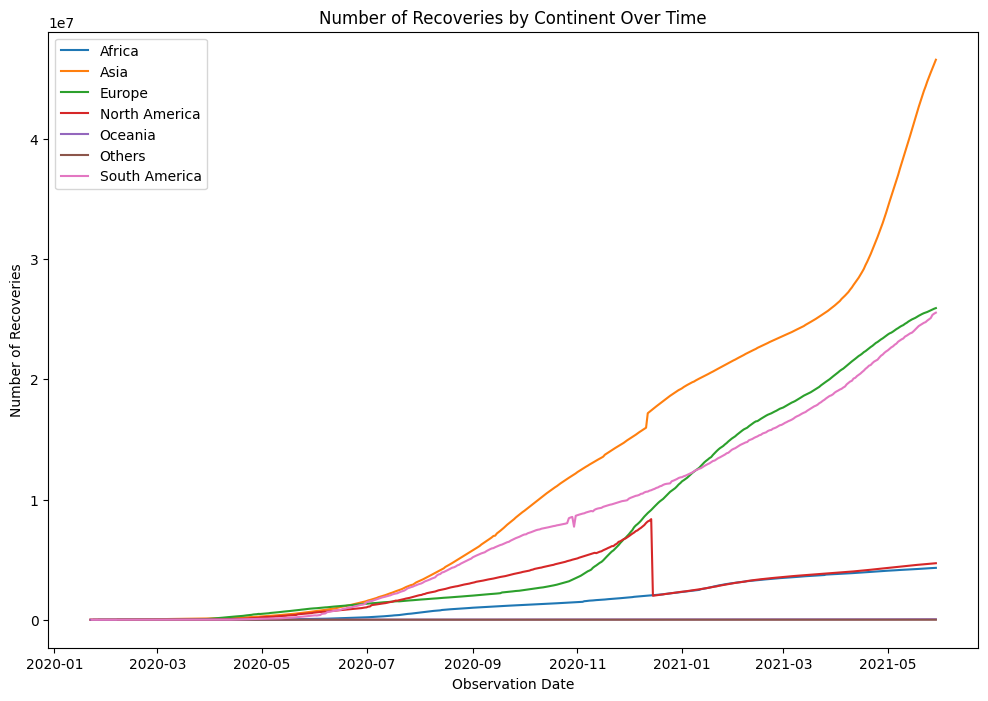

In [19]:
# Group by 'Country/Region' and 'Date' and sum the 'Deaths'
deaths_by_country = covid_df.groupby(['Continent', 'ObservationDate'])['Recovered'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for country, data in deaths_by_country.groupby('Continent'):
    plt.plot(data['ObservationDate'], data['Recovered'], label=country)

plt.title('Number of Recoveries by Continent Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Number of Recoveries')
plt.legend()
plt.show()

# Total Deaths by Continent

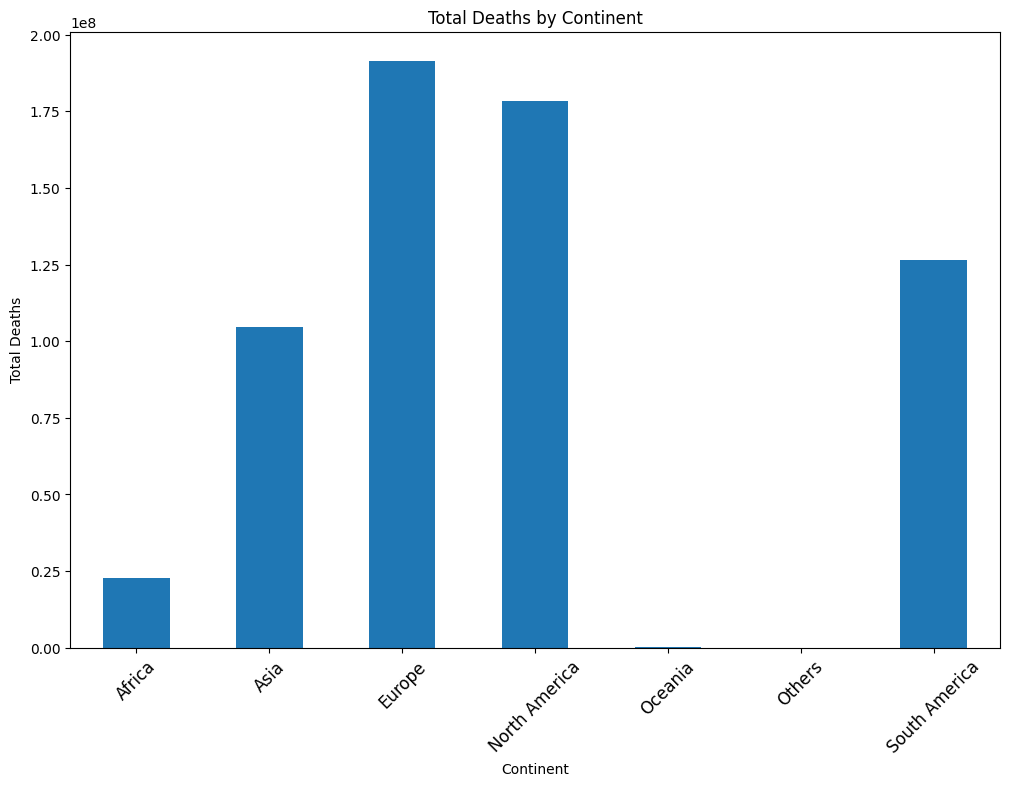

In [20]:
tot_num_death = covid_df.groupby(['Continent'])['Deaths'].sum()
plt.figure(figsize=(12, 8))
tot_num_death.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Continent')
plt.xticks(fontsize=12, rotation=45)
plt.show()


# Total Recoveries by Continent

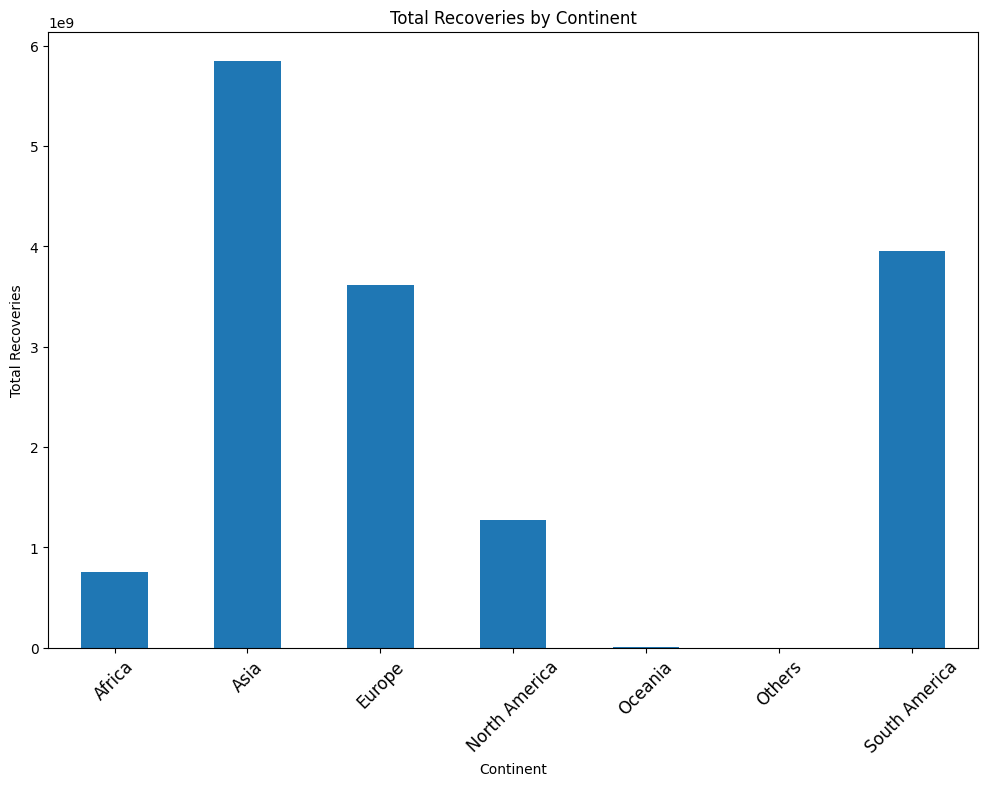

In [21]:
tot_num_death = covid_df.groupby(['Continent'])['Recovered'].sum()
plt.figure(figsize=(12, 8))
tot_num_death.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Total Recoveries')
plt.title('Total Recoveries by Continent')
plt.xticks(fontsize=12, rotation=45)
plt.show()

# Comparison of Deaths and Recoveries in the World Over Time

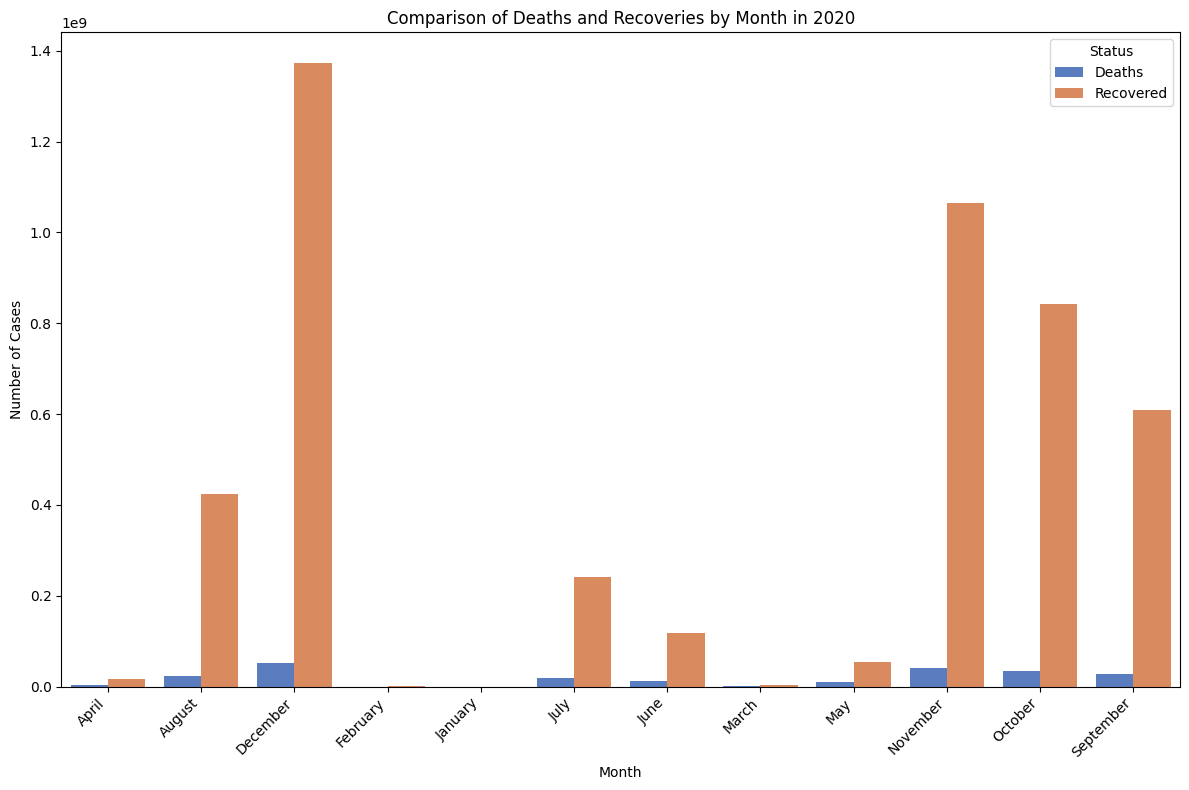

In [22]:
# Assuming covid_df is your DataFrame containing the COVID-19 data
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'])
covid_df['Year'] = covid_df['ObservationDate'].dt.year
covid_df['Month'] = covid_df['ObservationDate'].dt.month_name()

covid_df_2020 = covid_df[covid_df['Year'] == 2020]

# Group data by month and sum the deaths and recoveries for each month
monthly_totals = covid_df_2020.groupby('Month').agg({'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

# Melt the DataFrame to long format
monthly_totals_long = monthly_totals.melt(id_vars='Month', value_vars=['Deaths', 'Recovered'], var_name='Status', value_name='Number of Cases')

# Plotting the stacked bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Number of Cases', hue='Status', data=monthly_totals_long, palette='muted')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Comparison of Deaths and Recoveries by Month in 2020')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


Since I found data on Uzbekistan, my home country, I decided to analyze the number of deaths

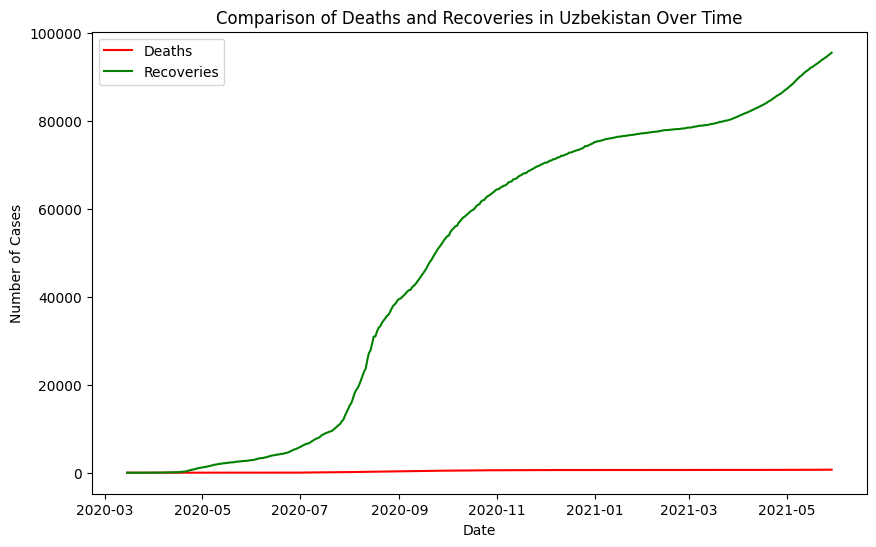

In [23]:
uzbekistan_data = covid_df[covid_df['Country/Region'] == 'Uzbekistan']
uzbekistan_deaths_by_date = uzbekistan_data.groupby('ObservationDate')['Deaths'].sum()
uzbekistan_recoveries_by_date = uzbekistan_data.groupby('ObservationDate')['Recovered'].sum()

plt.figure(figsize=(10, 6))
plt.plot(uzbekistan_deaths_by_date.index, uzbekistan_deaths_by_date.values, label='Deaths', color='red')
plt.plot(uzbekistan_recoveries_by_date.index, uzbekistan_recoveries_by_date.values, label='Recoveries', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Comparison of Deaths and Recoveries in Uzbekistan Over Time')
plt.legend()
plt.show()

# Comparison of Deaths and Recoveries by Month in 2020

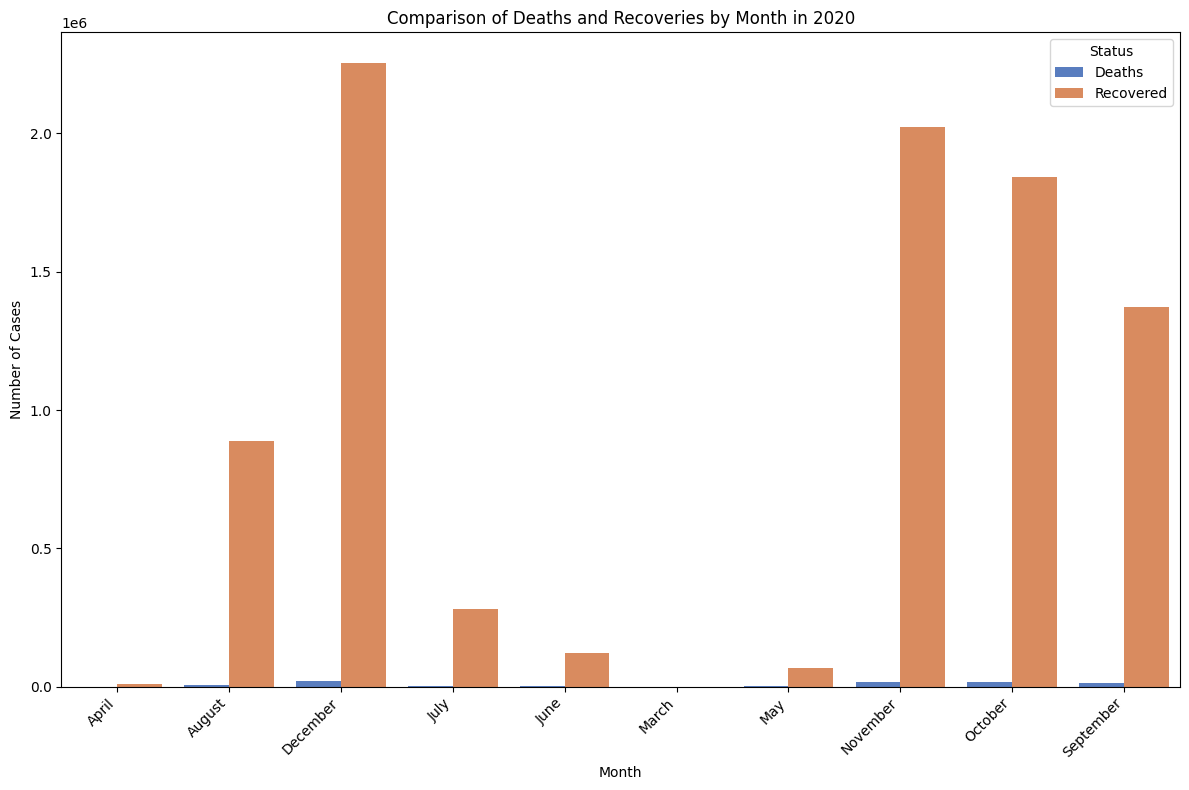

In [24]:
covid_df_2020 = covid_df[(covid_df['Year'] == 2020) & (covid_df['Country/Region'] == 'Uzbekistan')]
monthly_totals = covid_df_2020.groupby('Month').agg({'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

# Melt the DataFrame to long format
monthly_totals_long = monthly_totals.melt(id_vars='Month', value_vars=['Deaths', 'Recovered'], var_name='Status', value_name='Number of Cases')

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Number of Cases', hue='Status', data=monthly_totals_long, palette='muted')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Comparison of Deaths and Recoveries by Month in 2020')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Comparison of Deaths and Recoveries by Month in 2020 by Continents

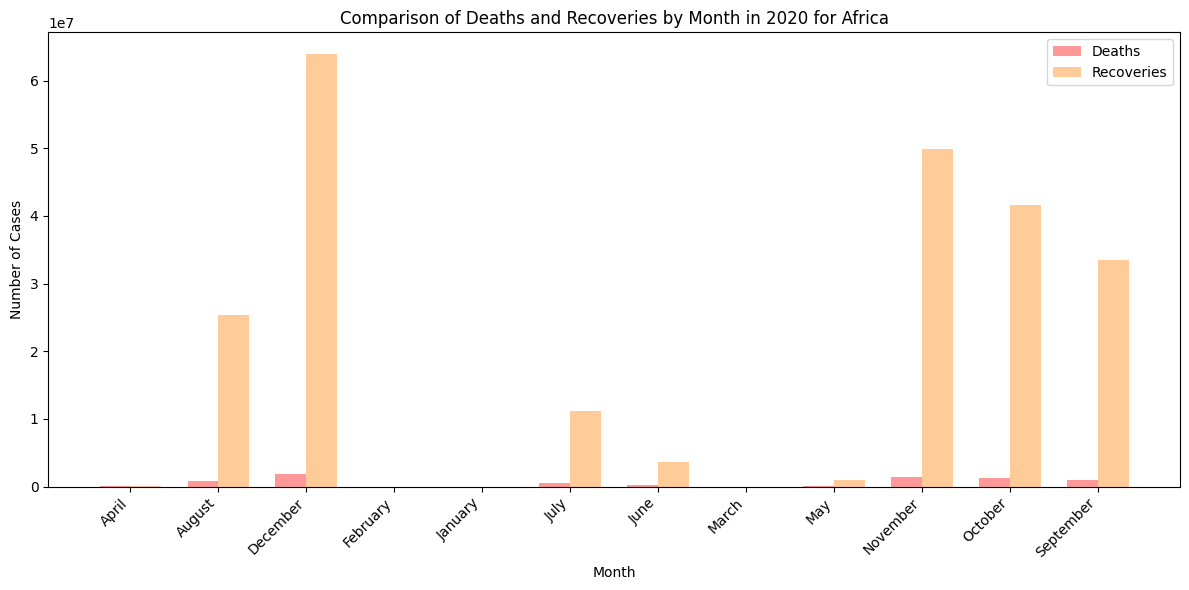

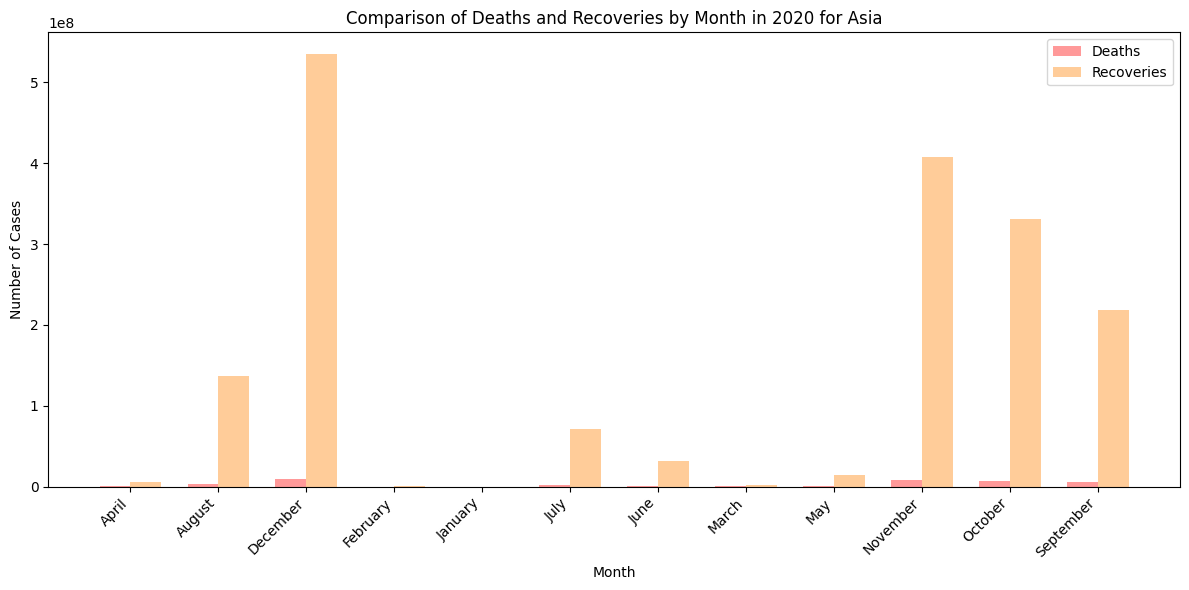

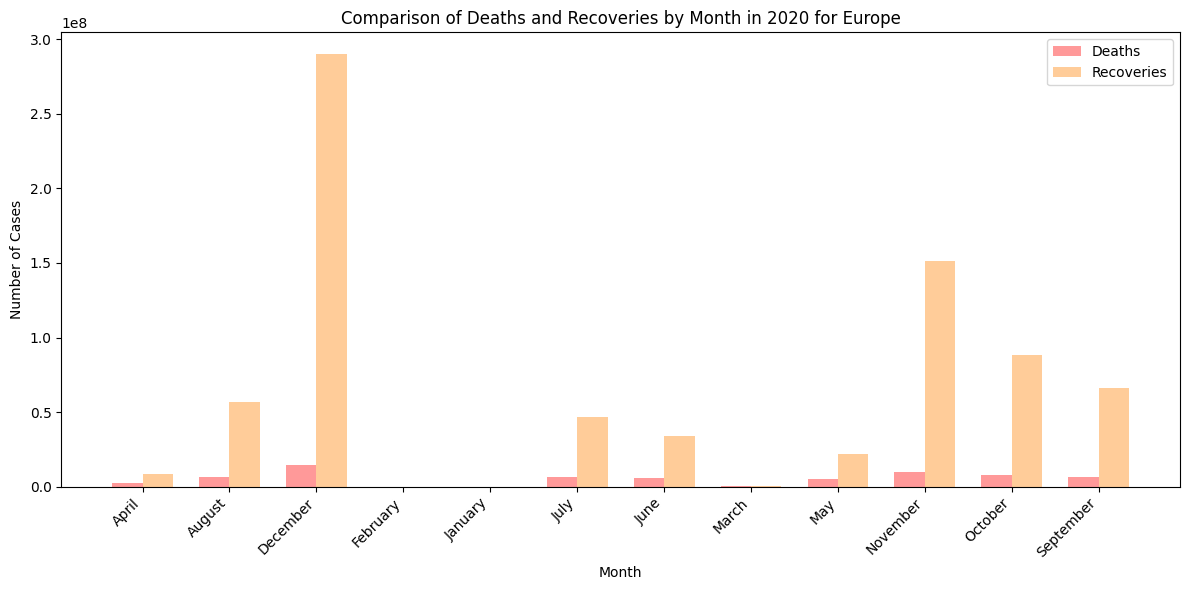

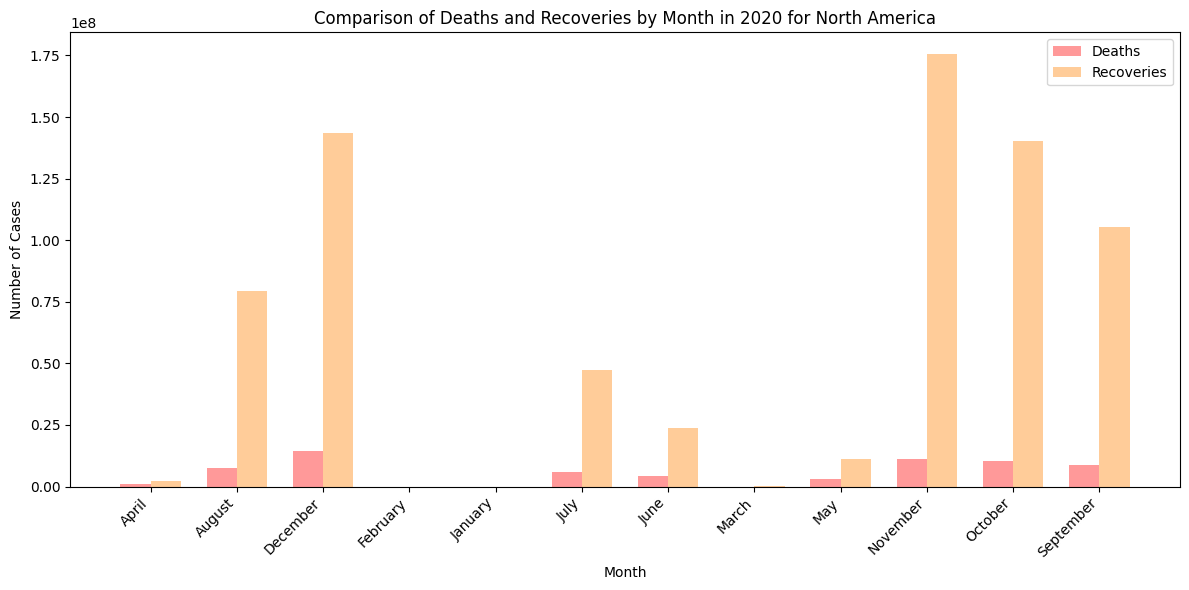

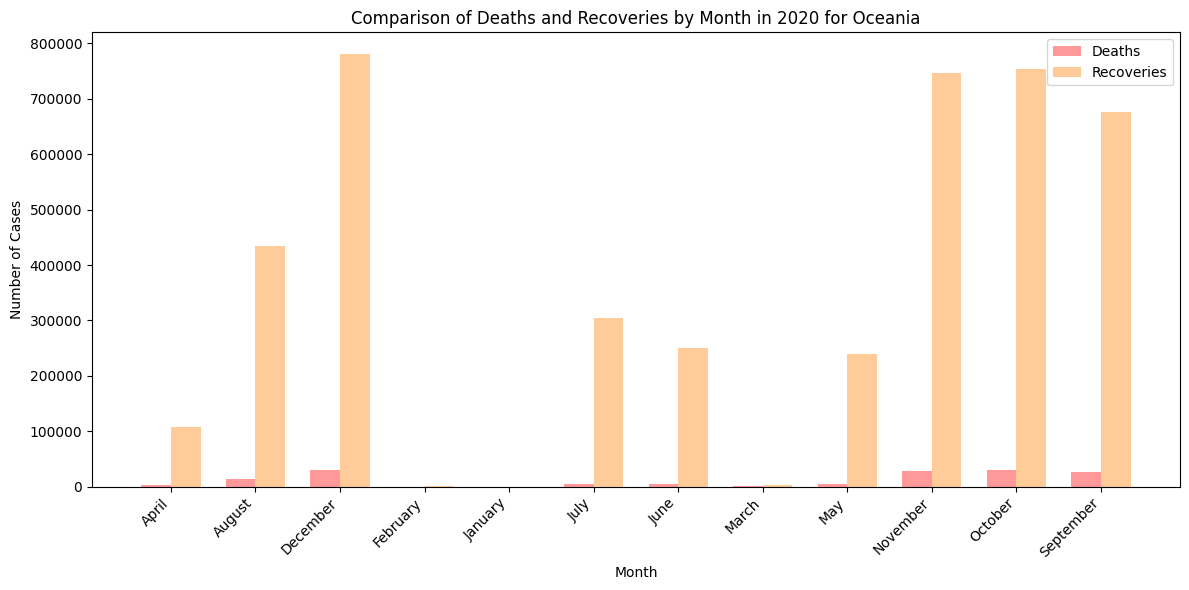

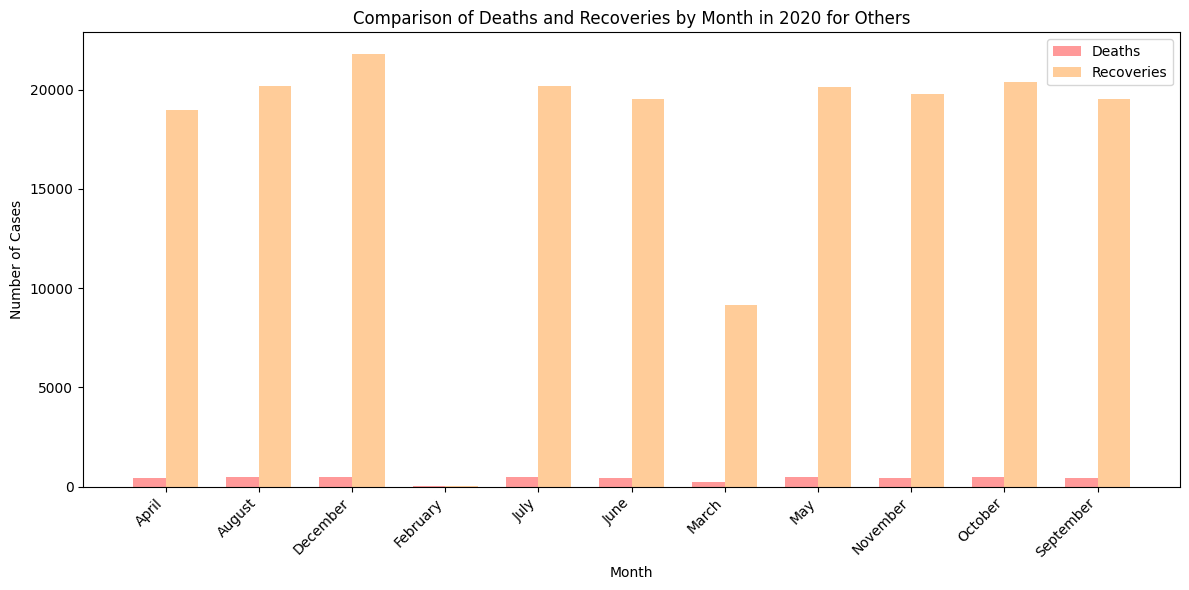

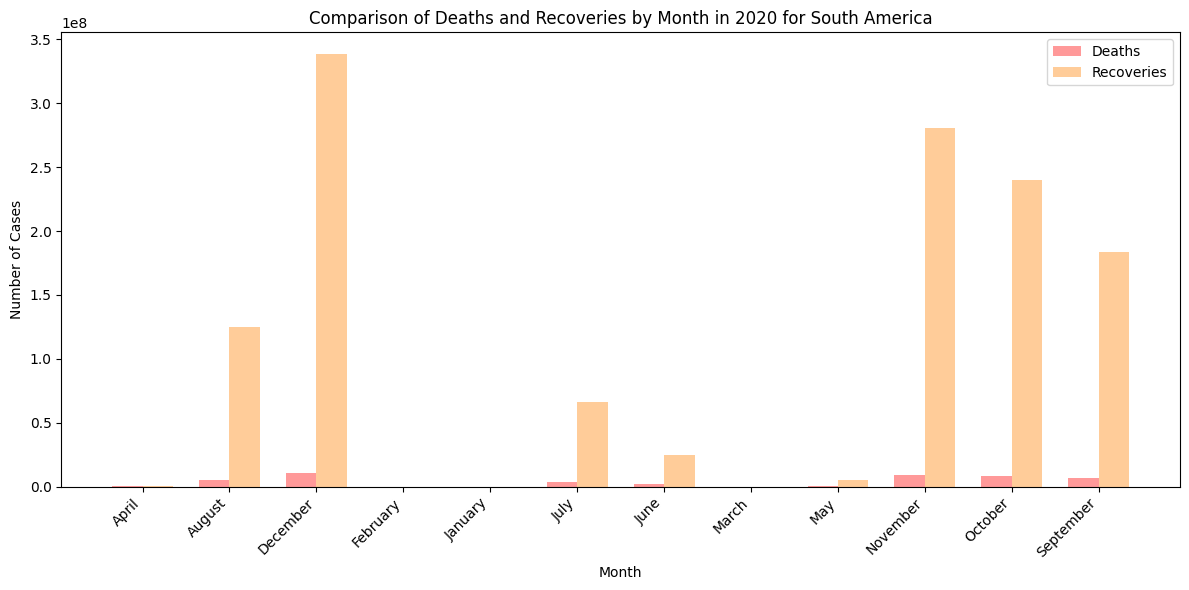

In [25]:
covid_df['Year'] = covid_df['ObservationDate'].dt.year
covid_df['Month'] = covid_df['ObservationDate'].dt.month_name()

# Filter data for the year 2020
covid_df_2020 = covid_df[covid_df['Year'] == 2020]

continent_monthly_totals = covid_df_2020.groupby(['Continent', 'Month']).agg({'Deaths': 'sum', 'Recovered': 'sum'})

# Get the list of unique continents
continents = continent_monthly_totals.index.get_level_values('Continent').unique()

# Warm color palette
colors = ['#ff9999', '#ffcc99']  # Red for deaths, orange for recoveries

# Plotting a separate bar chart for each continent
for continent in continents:
    continent_data = continent_monthly_totals.loc[continent]
    index = range(len(continent_data))
    
    plt.figure(figsize=(12, 6))
    plt.bar(index, continent_data['Deaths'], 0.35, label='Deaths', color=colors[0])
    plt.bar([i + 0.35 for i in index], continent_data['Recovered'], 0.35, label='Recoveries', color=colors[1])
    
    plt.xlabel('Month')
    plt.ylabel('Number of Cases')
    plt.title(f'Comparison of Deaths and Recoveries by Month in 2020 for {continent}')
    plt.xticks([i + 0.35/2 for i in index], continent_data.index, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()



# For Uzbekistan

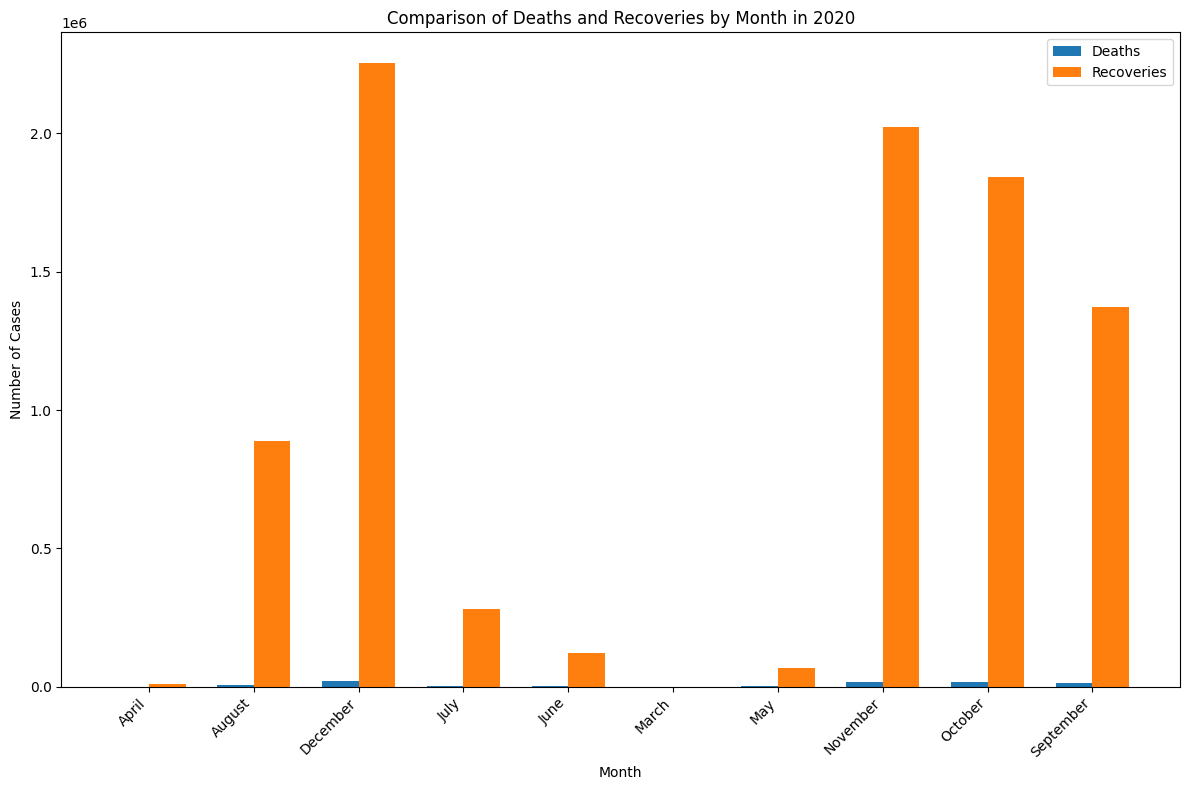

In [26]:
covid_df['Year'] = covid_df['ObservationDate'].dt.year
covid_df['Month'] = covid_df['ObservationDate'].dt.month_name()

# Filter data for the year 2020
covid_df_2020 = covid_df[(covid_df['Year'] == 2020) & (covid_df['Country/Region'] == 'Uzbekistan')]
monthly_totals = covid_df_2020.groupby('Month').agg({'Deaths': 'sum', 'Recovered': 'sum'})

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(monthly_totals))

plt.bar(index, monthly_totals['Deaths'], bar_width, label='Deaths')
plt.bar([i + bar_width for i in index], monthly_totals['Recovered'], bar_width, label='Recoveries')

plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Comparison of Deaths and Recoveries by Month in 2020')
plt.xticks([i + bar_width/2 for i in index], monthly_totals.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Pie chart which shows comparison between count of Deaths and Recoveries.

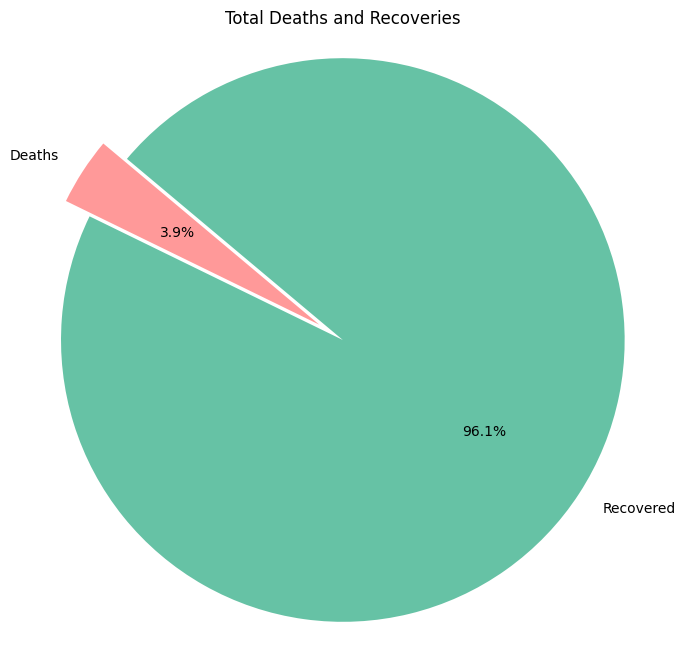

In [27]:
nbr_death = covid_df['Deaths'].sum()
nbr_recovered = covid_df['Recovered'].sum()

# Create a pie chart with warmer colors
labels = ['Deaths', 'Recovered']
sizes = [nbr_death, nbr_recovered]
colors = ['#ff9999', '#66c2a5']  # Warm colors: red for deaths, greenish for recoveries
explode = (0.1, 0)  # Explode the 'Deaths' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Total Deaths and Recoveries')
plt.show()

If you want you can change country name as you want